In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score
from sklearn import preprocessing 

# Dataset reading

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
dataset_source = "C://Users//SAMY//Desktop//Workshop//Model_Deployment//Breast_canser//Dataset//data.csv"
df = pd.read_csv(dataset_source).drop(['id','Unnamed: 32'],axis=1)
df['diagnosis'] = df['diagnosis'].str.replace('M','1')
df['diagnosis'] = df['diagnosis'].str.replace('B','0')
df = df.rename(columns={'diagnosis':'Target'})

df.head()

,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\SAMY\anaconda3\envs\breast_cancer\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target', ylabel='count'>

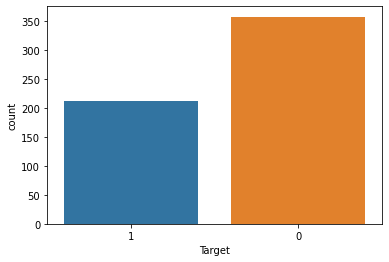

In [3]:
sns.countplot(df['Target'])

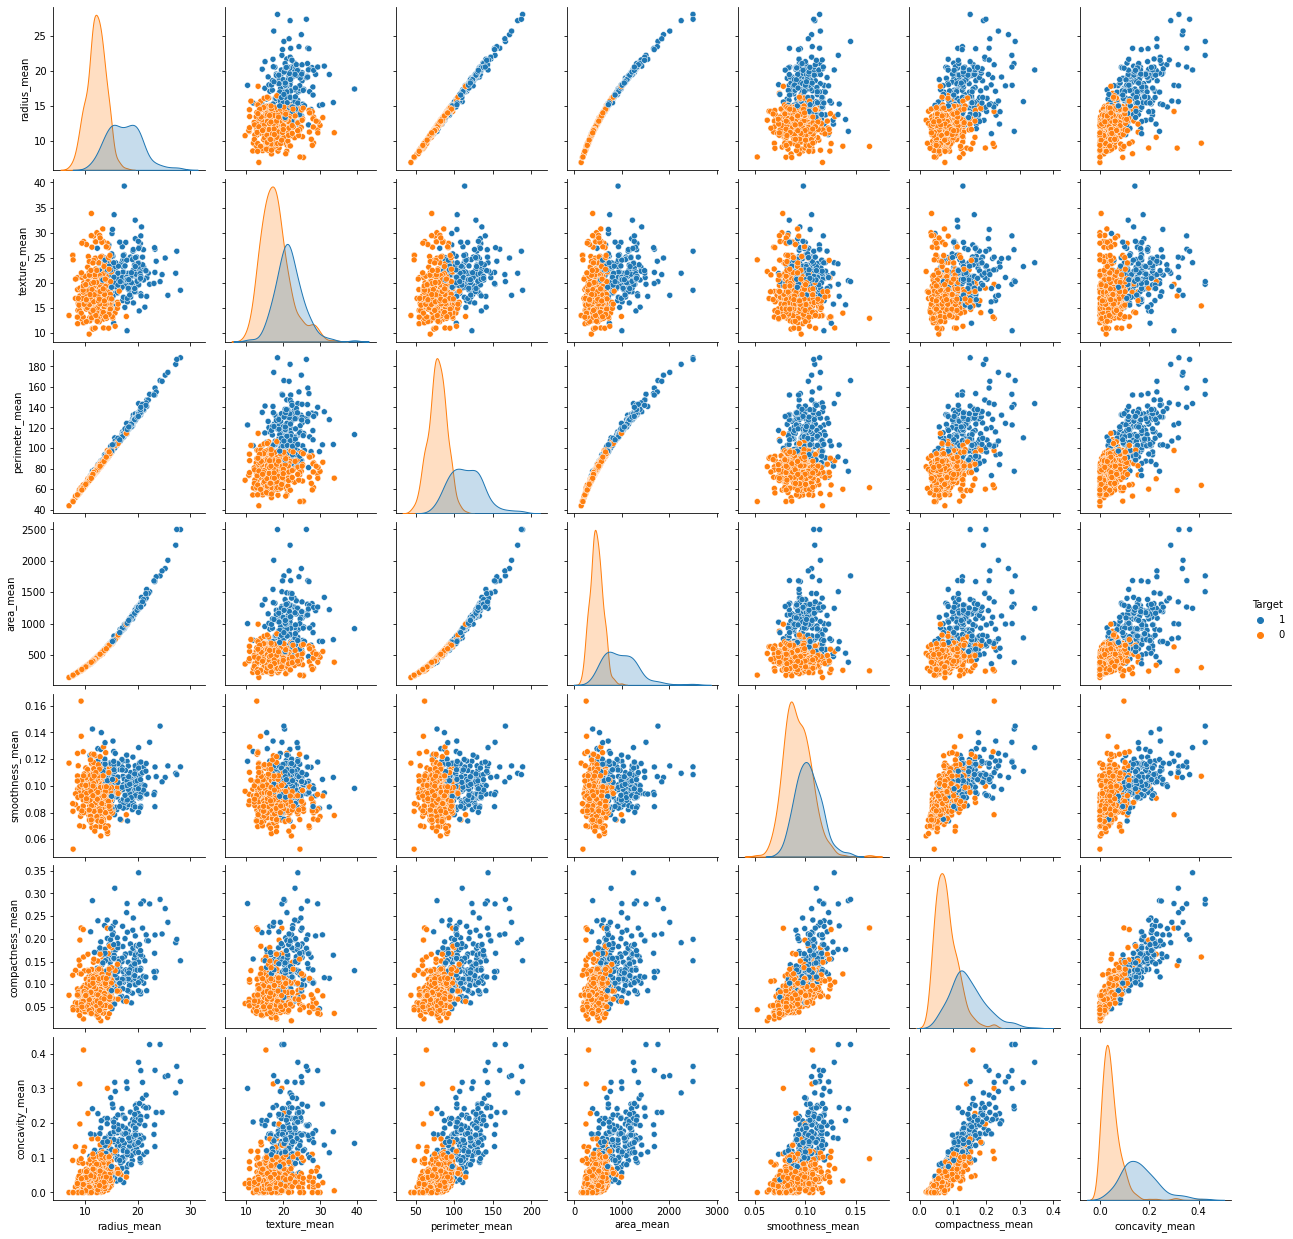

In [4]:
sns.pairplot(df , hue = 'Target' , vars = ['radius_mean', 'texture_mean' , 'perimeter_mean' , 'area_mean' , 'smoothness_mean','compactness_mean','concavity_mean'])

<AxesSubplot:>

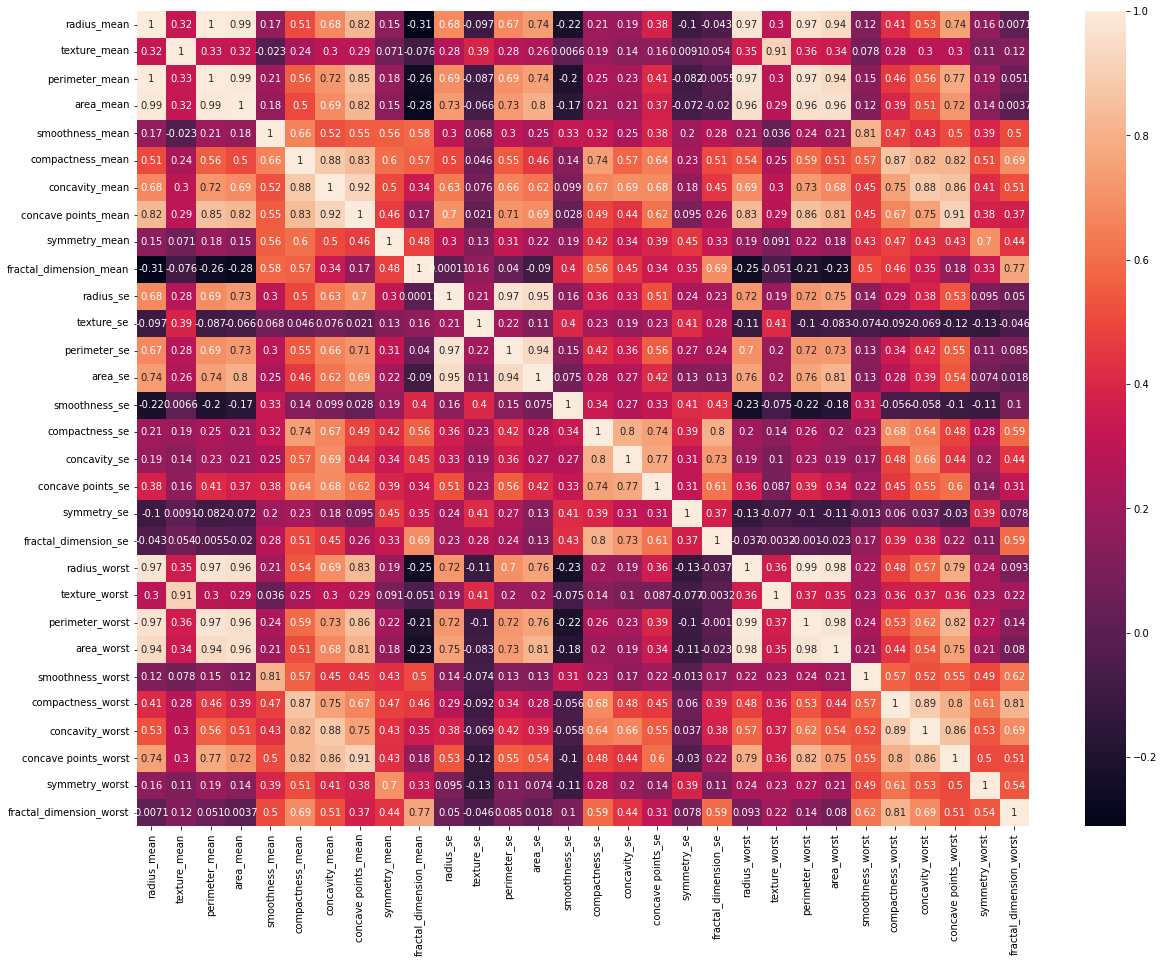

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() , annot = True)

# Data Preprocessing

In [6]:
y = df['Target'].astype(int)
X = df.drop('Target' , axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=5)

In [7]:
X_train.shape

(455, 30)

In [8]:
scaler = preprocessing.MinMaxScaler()
scaler_obj = scaler.fit(X_train)

In [9]:
X_train_scaled = scaler_obj.transform(X_train)
X_test_scaled = scaler_obj.transform(X_test)

In [10]:
scale_saved = 'scale.pkl'
joblib.dump(scaler_obj , scale_saved)

['scale.pkl']

# Fitting our model

In [11]:
svc_model = SVC()
svc_model.fit(X_train_scaled , y_train)
y_preds = svc_model.predict(X_test_scaled)
y_preds

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1])

# Acurracy Metrics of the Model

<AxesSubplot:>

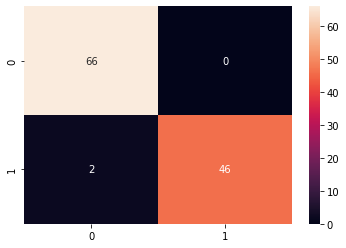

In [12]:
conf_mat = confusion_matrix(y_test , y_preds)
sns.heatmap(conf_mat , annot = True)

In [13]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [14]:
print(accuracy_score(y_test , y_preds))

0.9824561403508771


In [15]:
# Save Model computations in a file for the eployment step

model_saved = 'model.pkl'
joblib.dump(svc_model , model_saved)

['model.pkl']